In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep L/HR_Employee_Attrition_Data.csv')

In [ ]:
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,1,80,3,12,3,2,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()/ len(df) * 100

,0
Age,0.0
Attrition,0.0
BusinessTravel,0.0
DailyRate,0.0
Department,0.0
DistanceFromHome,0.0
Education,0.0
EducationField,0.0
EmployeeCount,0.0
EmployeeNumber,0.0


In [ ]:
int1 = []
obj1 = []

for i in df.columns:
    if df[i].dtypes == 'int64':
        int1.append(i)
    else:
        obj1.append(i)


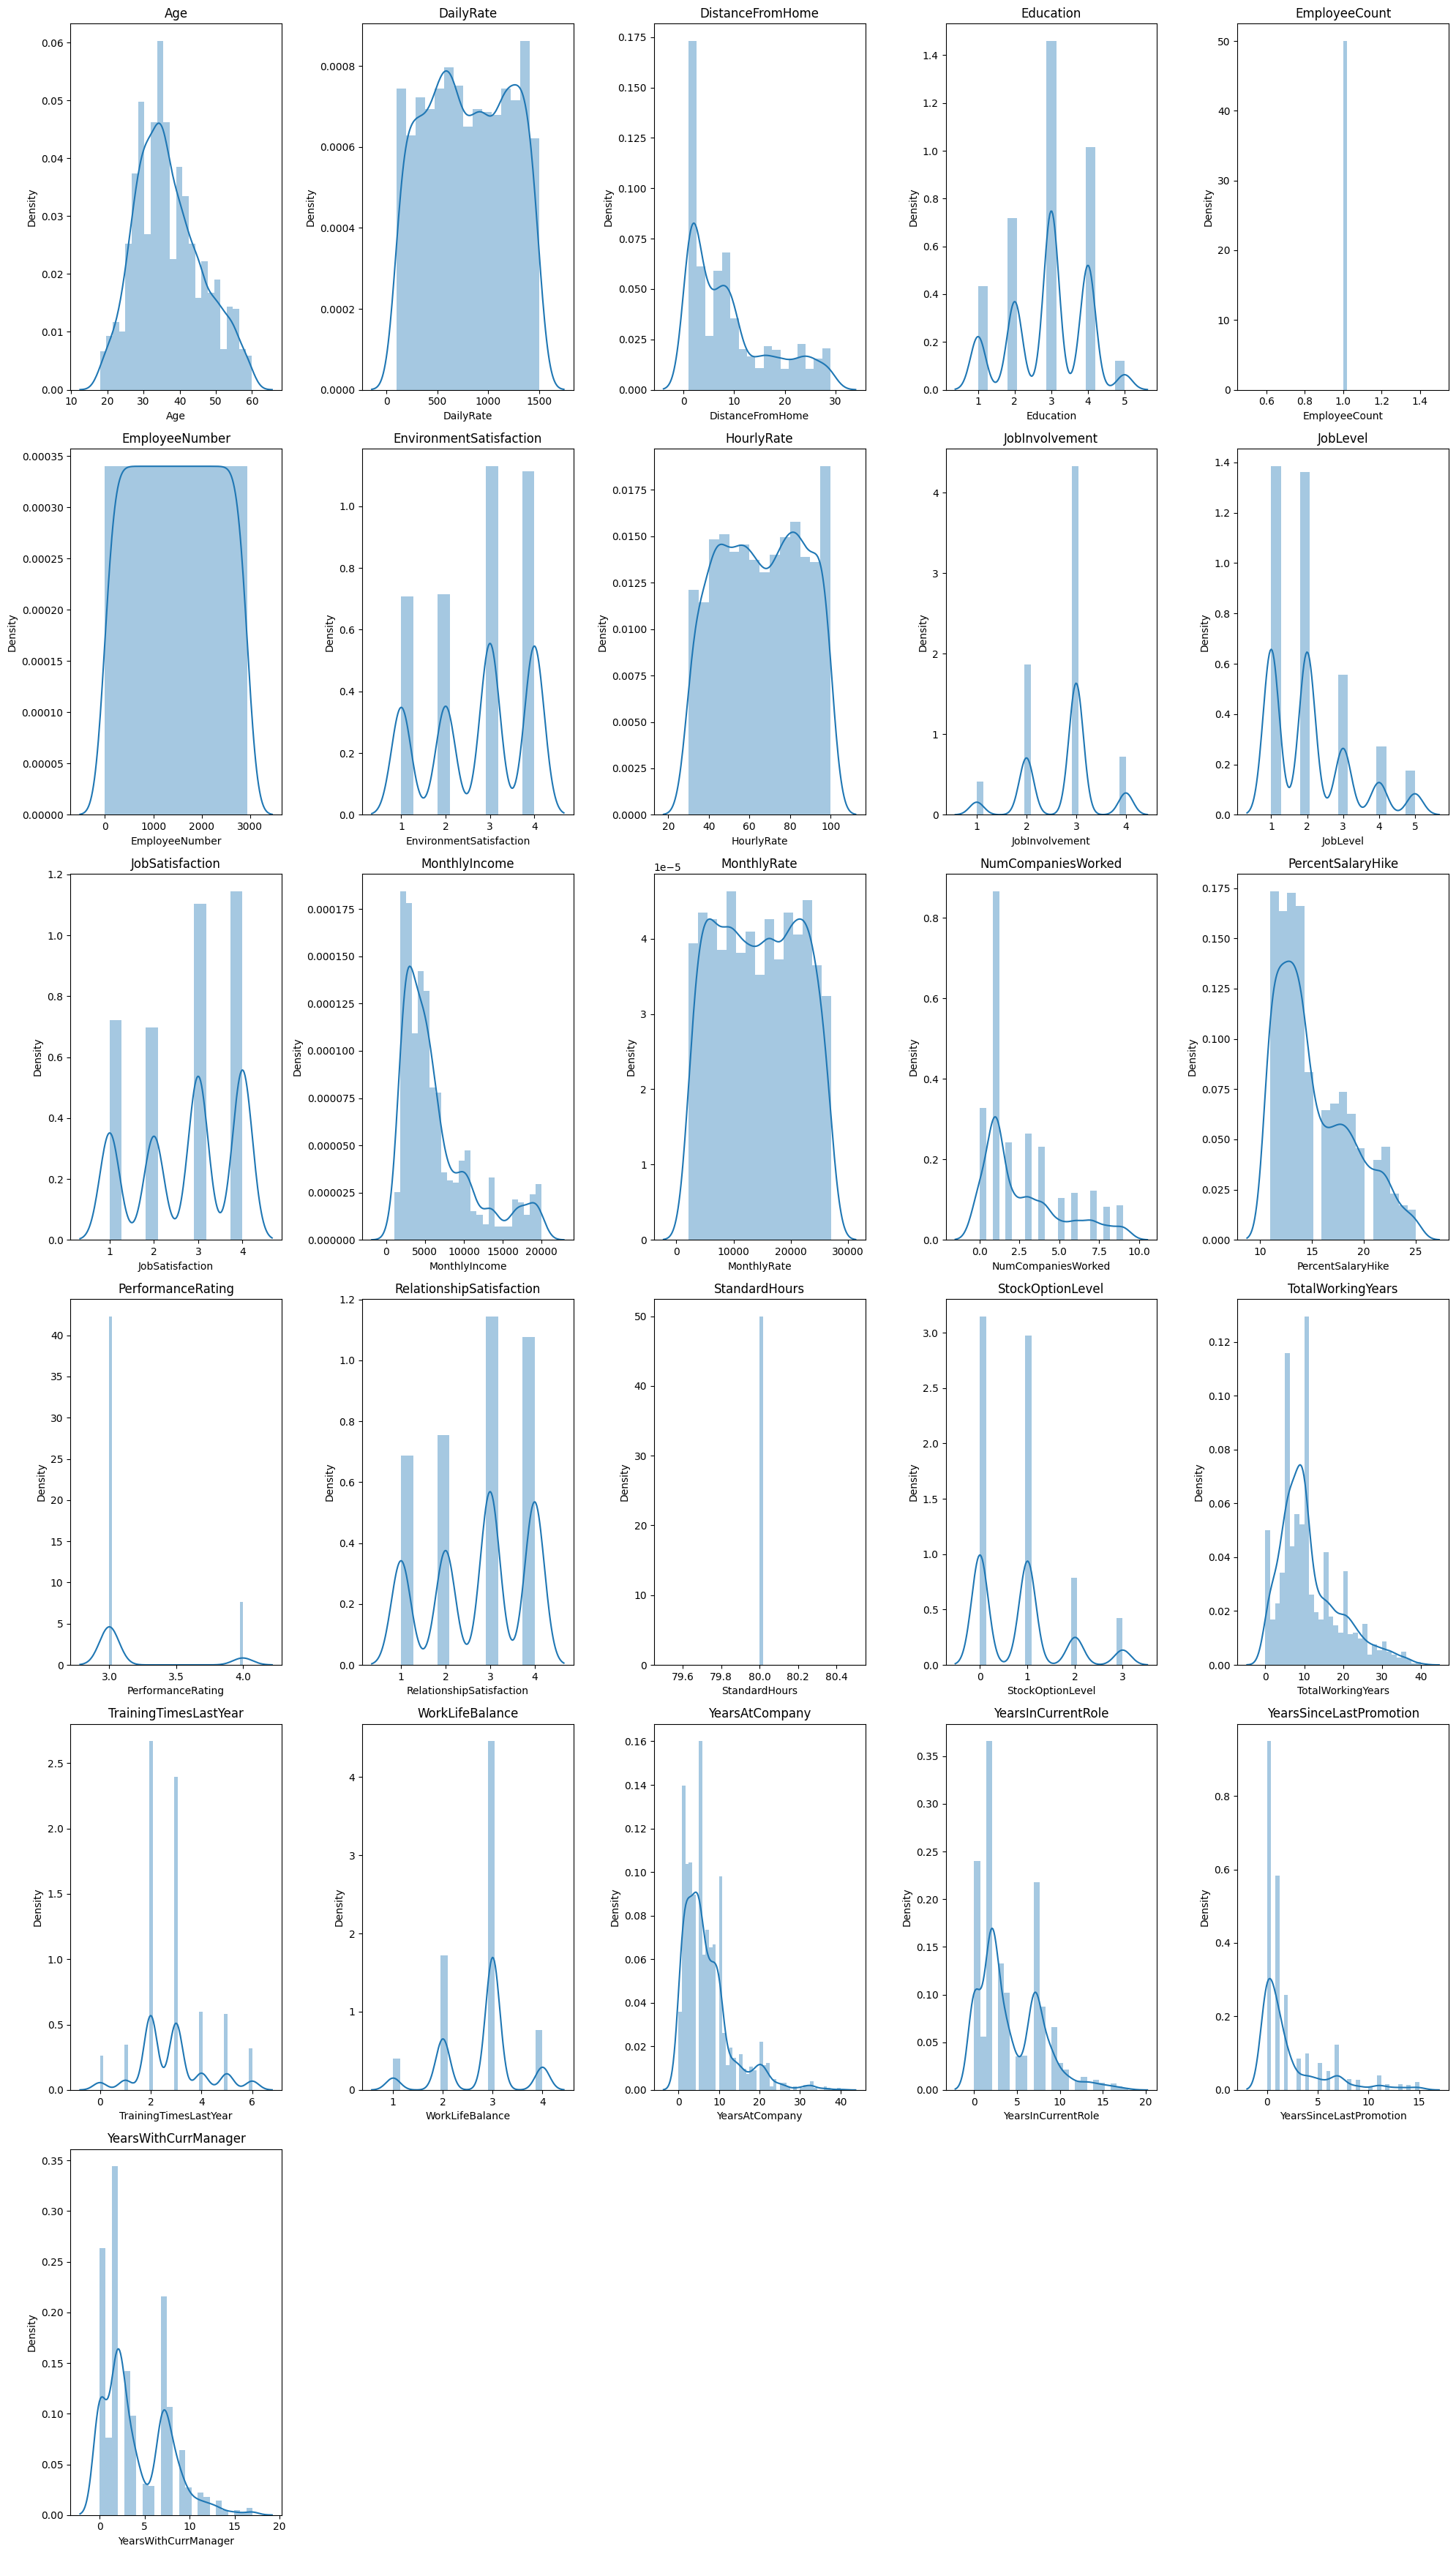

In [ ]:
plt.figure(figsize=(20, 35))

for i in range(0, len(int1)):
    plt.subplot(6, 5, i + 1)
    sns.distplot(df[int1[i]])
    plt.title(int1[i])

plt.tight_layout()
plt.show()

In [ ]:
print(df['Attrition'].value_counts())

Attrition
No     2466
Yes     474
Name: count, dtype: int64


In [ ]:
#creating a new variable 'cat_BusinessTravel' . Converting into a categorical variable
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3
df.loc[df['BusinessTravel'] == 'Travel_Rarely','cat_BusinessTravel'] = 1
df.loc[df['BusinessTravel'] == 'Travel_Frequently','cat_BusinessTravel'] = 2
df.loc[df['BusinessTravel'] == 'Non-Travel','cat_BusinessTravel'] = 3
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,80,0,7,3,3,0,0,0,0,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,80,1,6,3,3,2,2,2,2,1.0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,80,0,8,2,2,7,7,3,6,2.0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,80,3,12,3,2,1,0,0,0,1.0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,80,1,1,2,3,1,0,0,0,1.0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,...,80,0,10,2,3,9,7,1,8,2.0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,80,2,17,3,2,7,7,7,7,1.0


In [ ]:
#converting 'Department' data to ordinal variable
#Sales = 1
#Research and Development = 2
#Human Resorces = 3
df.loc[df['Department'] == 'Sales', 'ord_Department'] = 1
df.loc[df['Department'] == 'Research & Development', 'ord_Department'] = 2
df.loc[df['Department'] == 'Human Resources', 'ord_Department'] = 3

In [ ]:
#Checking for unwanted columns
print("EmployeeCount unique values::", df['EmployeeCount'].unique())
print("Over18 unique values::",df['Over18'].unique())
print("StandardHours unique values::",df['StandardHours'].unique())
#There is only one value for above column hence dropping it as they will not affect our model

EmployeeCount unique values:: [1]
Over18 unique values:: ['Y']
StandardHours unique values:: [80]


In [ ]:
df.drop(columns = ['EmployeeCount', 'Over18','StandardHours', 'EmployeeNumber'], inplace = True)

In [ ]:
df.shape

(2940, 33)

In [ ]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
categorical_features = ['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'cat_BusinessTravel',
 'ord_Department']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel,ord_Department
0,41,1,2,1102,2,1,2,1,2,0,...,0,8,0,1,6,4,0,5,0,0
1,49,0,1,279,1,8,1,1,3,1,...,1,10,3,3,10,7,1,7,1,1
2,37,1,2,1373,1,2,2,4,4,1,...,0,7,3,3,0,0,0,0,0,1


In [ ]:
y = df['Attrition'].astype(int)  # Target variable
X = df.drop(columns=['Attrition']).astype(int)  # Features

In [ ]:
x = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2352, 32)
(588, 32)
(2352,)
(588,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

[[0.30952381 1.         0.41947029 ... 0.05882353 0.         0.        ]
 [0.38095238 1.         0.11166786 ... 0.41176471 0.         0.        ]
 [0.4047619  1.         0.5583393  ... 0.47058824 0.         0.        ]
 ...
 [0.4047619  1.         0.46385111 ... 0.47058824 0.         0.5       ]
 [0.54761905 1.         0.24695777 ... 0.11764706 0.         0.5       ]
 [0.0952381  0.5        0.82605583 ... 0.         0.5        0.5       ]]
[[0.19047619 1.         0.91768074 ... 0.41176471 0.         0.5       ]
 [0.5952381  0.5        0.22906228 ... 0.11764706 0.5        0.5       ]
 [0.33333333 0.5        0.01002147 ... 0.11764706 0.5        0.5       ]
 ...
 [0.78571429 1.         0.4781675  ... 0.58823529 0.         1.        ]
 [0.38095238 1.         0.98639943 ... 0.         0.         0.        ]
 [0.71428571 0.         0.83035075 ... 0.05882353 1.         0.5       ]]


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(layers.Dense(500, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │          16,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,001 (554.69 KB)

 Trainable params: 142,001 (554.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=34, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/34
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7803 - loss: 0.4738 - val_accuracy: 0.8365 - val_loss: 0.3847
Epoch 2/34
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8536 - loss: 0.3609 - val_accuracy: 0.8577 - val_loss: 0.3566
Epoch 3/34
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8675 - loss: 0.3375 - val_accuracy: 0.8535 - val_loss: 0.3479
Epoch 4/34
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8839 - loss: 0.3057 - val_accuracy: 0.8662 - val_loss: 0.3273
Epoch 5/34
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8854 - loss: 0.3129 - val_accuracy: 0.8662 - val_loss: 0.3231
Epoch 6/34
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8998 - loss: 0.2777 - val_accuracy: 0.8726 - val_loss: 0.3046
Epoch 7/34
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9053 - loss: 0.2644 - val_accuracy: 0.8705 - val_loss: 0.3238
Epoch 8/34
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8970 - loss: 0.2608 - val_accuracy: 0.8832 - va

In [ ]:
score, acc = model.evaluate(X_train, y_train,batch_size=32)
print('Train score', score)
print('Train accuracy', acc)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9631 - loss: 0.1017
Train score 0.1311509609222412
Train accuracy 0.9536564350128174


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

accuracy_score(y_test,y_pred)

0.9370748299319728

Text(0.5, 23.52222222222222, 'Prediction label')

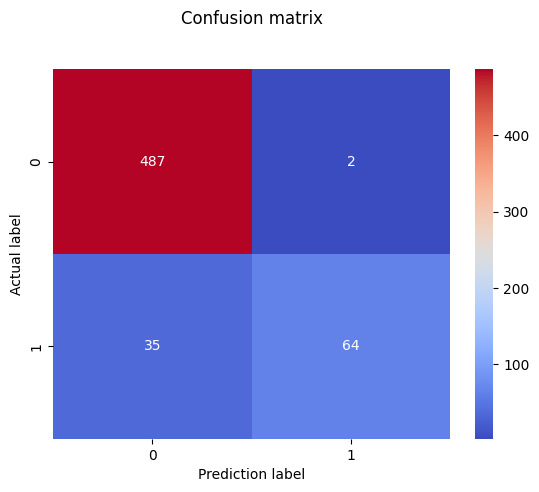

In [ ]:
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', cmap='coolwarm')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Prediction label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       489
           1       0.97      0.65      0.78        99

    accuracy                           0.94       588
   macro avg       0.95      0.82      0.87       588
weighted avg       0.94      0.94      0.93       588



19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


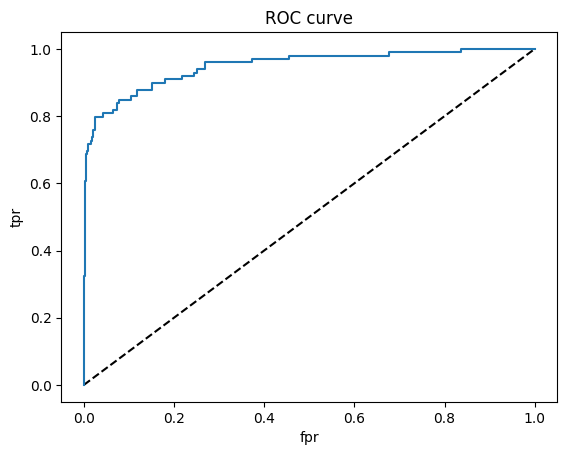

In [ ]:
from sklearn.metrics import roc_curve

# Predict probabilities using the model
y_pred_proba = model.predict(X_test)

# Assuming y_test is binary (0 and 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
x_test_reshaped = X_test[5].reshape(1, -1)
result = model.predict(x_test_reshaped)
(result > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0]])

In [ ]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'cat_BusinessTravel', 'ord_Department'],
      dtype='object')